In [5]:
#I do this just because there are cool plots
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

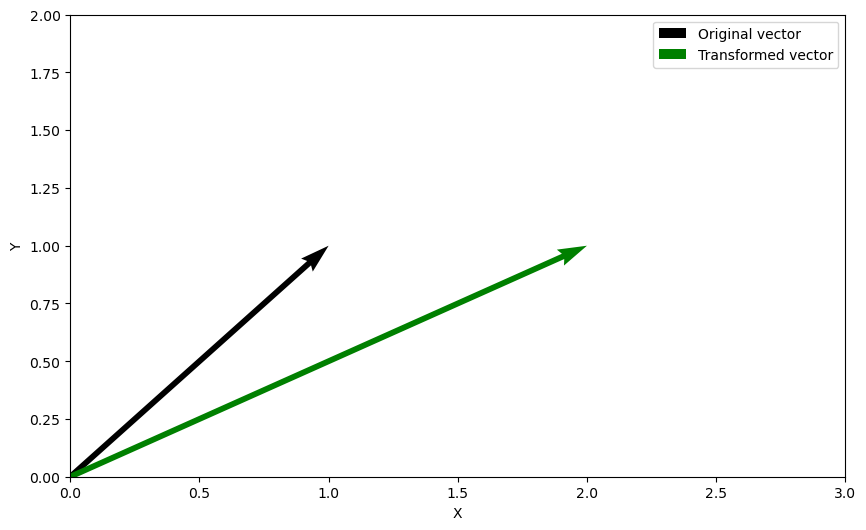

In [3]:
A = np.array([[2, 0],[0, 1]])

x = np.array([[1],[1]])
b = np.dot(A, x)
plot_vect(x,b,(0,3),(0,2))

In this case, $x$ is __not__ an eigenvector of $A$: it changes direction if $A$ is applied to it!

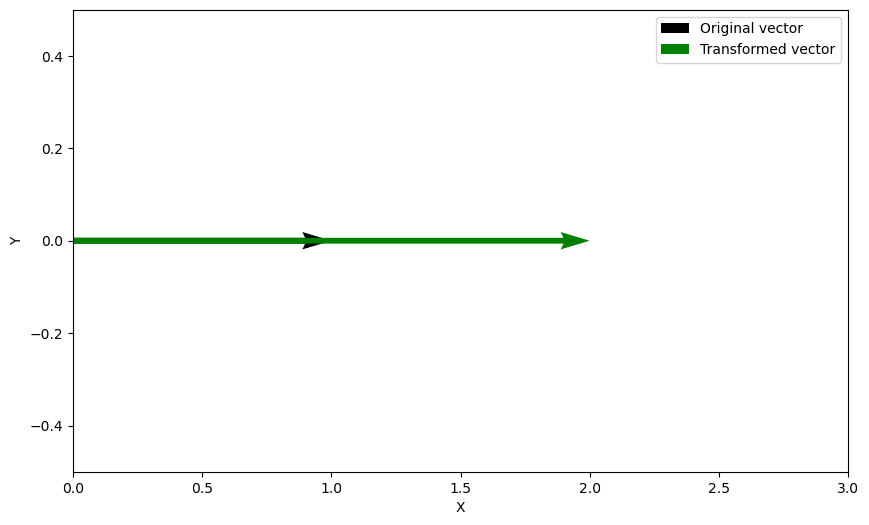

In [4]:
x = np.array([[1], [0]])
b = np.dot(A, x)

plot_vect(x,b,(0,3),(-0.5,0.5))


In this case, $x$ __is__ an eigenvector of $A$: it does not change direction if $A$ is applied to it! Its module is changed by its eigenvalue.

# Power Methods

These are iterative methods to build approximations for either:
- The eigenvector with the largest eigenvalue (direct method)
- The eigenvector with the smallest eigenvalue (inverse method)
- All eigenvectors at the price of a lot of work (shifted method)

## The Direct Power Method

We all know that finding the eigenvectors is a big pain. Luckily there is a pretty quick method to get the largest eigenvalues, and this is done by applying repeatedly the matrix $A$ to a linear combination of eigenvectors.

Suppose $x_0=\sum_{i=1}^n c_i v_i$, where $c_1\neq0$, $Av_i=\lambda_i v_i$ and $\lambda_1>\lambda_2\geq \lambda_i$. 

Multiplying this decomposition of $x_0$ by $A$, we simply get:

$Ax_0=c_1\lambda_1 x_1$, with $x_1=v_1+\sum_{i=2}^n \dfrac{c_i}{c_1}\dfrac{\lambda_i}{\lambda_1}$.

The point is that we can keep multiplying this by $A$ to get the relation:

$Ax_{k-1}=\lambda_1 x_{k}$, with $x_{k}=v_1+\sum_{i=2}^n\dfrac{c_i}{c_1}\dfrac{\lambda_i^k}{\lambda_1^k}v_i$.

Of course as $k\rightarrow\infty,\,\dfrac{\lambda_i^k}{\lambda_1^k}\rightarrow 0$ and thus we are left with:

$Ax_{k-1}=\lambda_1v_1$

One usually normalises $x_{k}$ at every iteration so that its largest element is $1$. What's the stopping criterion?
1) The difference between eigenvalues is less than some specified tolerance;
2) Angle between eigenvectors is smaller than a threshold;
3) Norm of the residual vector is small enough.

In [23]:
# manual implementation
A=np.array([[0,2],[2,3]])
x0=np.array([[1],[1]])

x1=np.dot(A,x0)/np.amax(np.dot(A,x0))
print('first iteration:\n',x1) #first iteration

x2=np.dot(A,x1)/np.amax(np.dot(A,x1))
print('second iteration:\n',x2) #second iteration

x3=np.dot(A,x2)/np.amax(np.dot(A,x2))
print('third iteration:\n',x3) #third iteration

x4=np.dot(A,x3)/np.amax(np.dot(A,x3))
print('fourth iteration:\n',x4) #fourth iteration

# eigenvalue of x4
print('approximate eigenvalue is:\n', np.dot(A,x4)/x4) #about 4

first iteration:
 [[0.4]
 [1. ]]
second iteration:
 [[0.52631579]
 [1.        ]]
third iteration:
 [[0.49350649]
 [1.        ]]
fourth iteration:
 [[0.50162866]
 [1.        ]]
approximate eigenvalue is:
 [[3.98701299]
 [4.00325733]]


It converges to the eigenvector $(1/2,1)^T$, which has eigenvalue $4$.

In [24]:
# more automatic implementation
def normalize(x):
    fac = abs(x).max()
    x_n = x / x.max()
    return fac, x_n
x = np.array([1, 1])
a = np.array([[0, 2], 
              [2, 3]])

for i in range(8):
    x = np.dot(a, x)
    lambda_1, x = normalize(x)
    
print('Eigenvalue:', lambda_1)
print('Eigenvector:', x)

Eigenvalue: 3.999949137887188
Eigenvector: [0.50000636 1.        ]


## The Inverse Power Method

<font color=blue>Note: this is completely wrong in the book, even the numerical results.</blue>

It's literally the same except that we multiply by $(A-\mu 1)^{-1}$ at each iteration, where $\mu$ is some ansatz for the eigenvalue we want. At the end we'll end up with an equation of the form:

$(A-\mu 1)^{-1} y_k= \lambda_n^{-1} v_n$

The proof is literally the same since eigenvectors of $A$ are the same of $A^{-1}$ and eigenvalues are the inverse. One just needs to further assume that $\lambda_n < \lambda_{n-1} \leq \lambda_i$.

In [31]:
a_inv = np.linalg.inv(a-np.eye(2)) #assume mu=1

for i in range(8):
    x = np.dot(a_inv, x)
    lambda_2, x = normalize(x)
    
print('Eigenvalue:', 1/lambda_2)
print('Eigenvector:', x)

Eigenvalue: 1.9999998257707077
Eigenvector: [-2.00000035  1.        ]


## The Shifted Power Method

Given $Ax=\lambda x$, and $\lambda_1$ is the largest eigenvalue obtained by the power method, then we can have:

<center>$[A-\lambda_1 1]x=\alpha x$ </center>

where $\alpha$’s are the eigenvalues of the shifted matrix $A-\lambda_1 1$, which will be $0,\lambda_2-\lambda_1,\dots, \lambda_n-\lambda_1$.

Now if we apply the power method to the shifted matrix, then we can determine the largest eigenvalue of the shifted matrix, i.e. $\alpha_k$. Since $\alpha_k=\lambda_k−\lambda_1$, we can get the eigenvalue $\lambda_k$ easily. We can repeat this process many times to find the all the other eigenvalues. But you can see that, it involves a lot of work! 

# QR decomposition

This method decomposes a matrix $M$ into an orthogonal matrix $Q$ and an upper triangular matrix $R$:
<center> $M=QR$</center>
This can be used to find eigenvalues of a matrix $A_0$ as follows.

Suppose at $k$-th step we perform $QR$ decomposition: $A_k=Q_kR_k$. We then define $A_{k+1}\equiv R_kQ_k$ and note that:

<center>$A_{k+1}=R_kQ_k=Q_{k}^{-1}Q_kR_kQ_k=Q_{k}^{-1}A_kQ_k\rightarrow A_k$ is <b>similar</b> to $A_j$ for all $k,j$.  </center>
<br>
Therefore, all $A_k$ have the same eigenvalues as $A_0$. The point is that as we increase $k$, $A_k$ converges to the upper triangular form:
<center> $\lim_{k\rightarrow\infty}A_k = \begin{pmatrix}\lambda_1 & * & * &\dots & *\\ 0 & \lambda_2 & * & \dots &*\\ & & \dots & \\
    0 & 0 & \dots & 0 & \lambda_n\end{pmatrix}$, where $\lambda_i$ are eigenvalues of $A_0$.</center>

In each iteration, the $QR$ decomposition in made via the __Householder matrix__. We'll just use the Python function `numpy.linalg.qr`.

In [33]:
a = np.array([[0, 2], 
              [2, 3]])

q, r = np.linalg.qr(a)

print('Q:\n', q)
print('R:\n', r)

b = np.dot(q, r)
print('QR:\n', b)

Q:
 [[ 0. -1.]
 [-1.  0.]]
R:
 [[-2. -3.]
 [ 0. -2.]]
QR:
 [[0. 2.]
 [2. 3.]]


In [36]:
a = np.array([[0, 2], 
              [2, 3]])
p = [1, 5, 10, 20]
for i in range(20):
    q, r = np.linalg.qr(a) #qr decomposition
    a = np.dot(r, q) #form new upper triangular matrix rq
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(a)

Iteration 1:
[[3. 2.]
 [2. 0.]]
Iteration 5:
[[ 3.99998093  0.00976559]
 [ 0.00976559 -0.99998093]]
Iteration 10:
[[ 4.00000000e+00  9.53674316e-06]
 [ 9.53674316e-06 -1.00000000e+00]]
Iteration 20:
[[ 4.00000000e+00  9.09484250e-12]
 [ 9.09494702e-12 -1.00000000e+00]]


# Eigenvalues and Eigenvectors via Numpy directly

The standard `numpy.linalg` function to compute eigenvalues and eigenvectors of a matrix is `eig`. It returns a `tuple`, with the first element being the eigenvalues, the second the eigenvectors.

In [38]:
from numpy.linalg import eig
a = np.array([[0, 2], 
              [2, 3]])
w,v=eig(a)
print('E-value:\n', w)
print('E-vector:\n', v)

E-value:
 [-1.  4.]
E-vector:
 [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]
